# Ch 4 Expiration Profit and Loss

In [2]:
! pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 28.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 29.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.6 MB/s eta 0:00:00:00:0100:01


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x = np.array([1,2,3,4,5,6])
y = np.array([0,0,0,1,2,3])

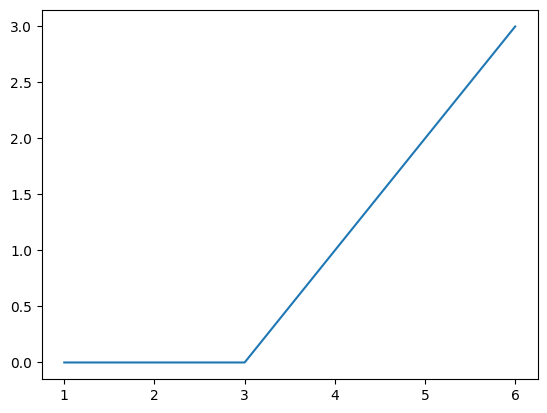

In [6]:
# this is a plot of a long call option that has a ecercise price at 3
plt.plot(x,y)

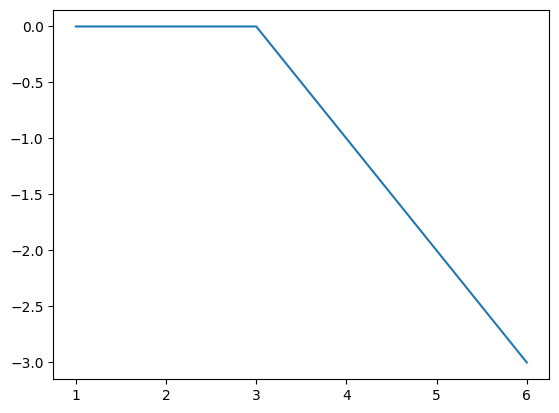

In [8]:
# sell a call option
plt.plot(x,-y)

In [9]:
x = np.array([1,2,3,4,5,6])
y = np.array([3,2,1,0,0,0])

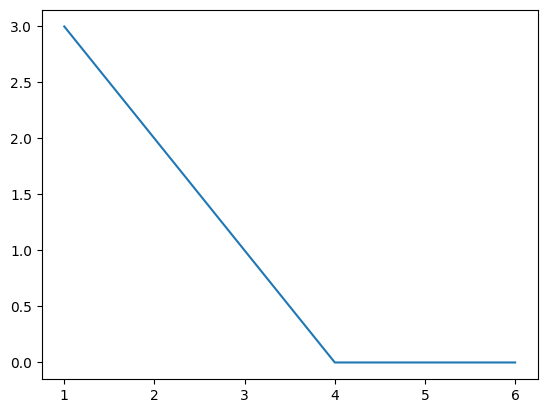

In [11]:
# long put option
plt.plot(x,y)

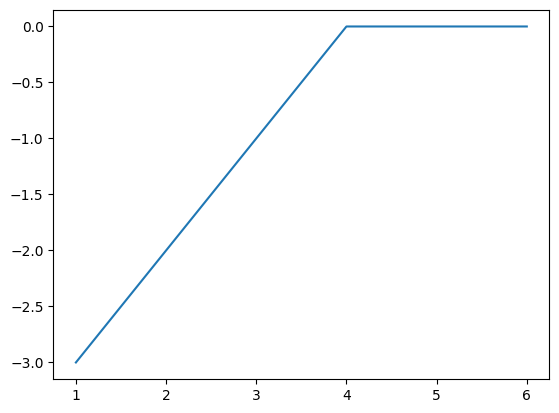

In [12]:
# sell put option
plt.plot(x,-y)

In [55]:
def profit_option_graph(exercise_price,amount,type_of_option='call'):
    """
    Var
    exercise_price (float): the exersise price of the call or put
    amount (int): the amout that you would like to buy or sell of an option
    type_of_option (str): call or put

    Out
    a profit graph of the option
    
    """
    if type_of_option == 'call':
        x = np.arange(exercise_price-5, exercise_price+5)
        y =np.where(x>exercise_price,1,0)
        y = np.cumsum(y) * amount
        plt.plot(x,y)
        plt.show()
    else:
        x = np.arange(exercise_price-5, exercise_price+5)
        y =np.where(x<exercise_price,1,0)
        y = np.cumsum(y[::-1])[::-1] * amount
        plt.plot(x,y)
        plt.show()

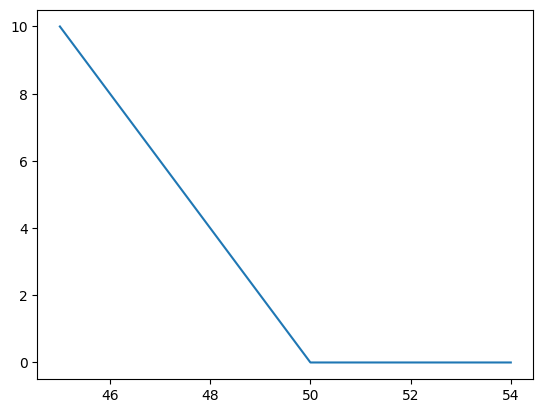

In [56]:
profit_option_graph(50,2,'put')

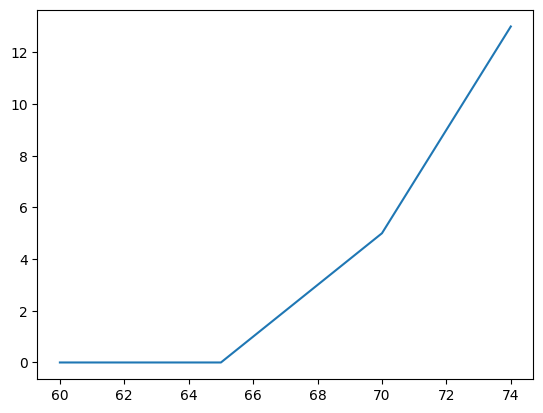

In [74]:
# 65 call +1
# 70 call +2
x = np.arange(65-5, 70+5)
y =np.where(x>65,1,0)
y = np.cumsum(y)

y2 =np.cumsum(np.where(x>70,1,0))

y = y+y2
plt.plot(x,y)


[5 4 3 2 1 0 0 0 0 0]


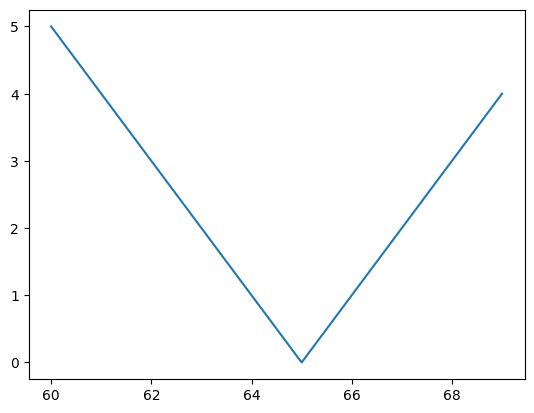

In [75]:
#65 call 1
# 65 put 1

x = np.arange(65-5, 65+5)
y =np.where(x>65,1,0)
y = np.cumsum(y)

y2 =np.cumsum(np.where(x<65,1,0)[::-1])[::-1]
print(y2)

y = y+y2
plt.plot(x,y)


In [410]:
# take in multiple option orderes
class optionGraph:
    """A class for representing and plotting option graphs."""
    def __init__(self):
        """
        Initializes the optionGrapgh object.

        Attributes:
          option_type: The type of option, either `call` or `put`.
          amount: The number of options.
          exercise_price: The exercise price of the option.
          slope: The slope of the option graph.
          price_range_max: The maximum price range of the option graph.
          price_range_min: The minimum price range of the option graph.
          multi_options_pos: A dictionary containing the positions of multiple option graphs in a multi-option plot. This attribute is only used in the `multi_option()` method.
        """
        self.option_type = ''
        self.amount = None
        self.exercise_price = None
        self.slope = None
        self.price_range_max = None
        self.price_range_min = None  
        self.contract_price = None
        self.multi_options_pos = None

    def get_slope(self):
        """
        Calculates the slope of the option graph.

        Returns:
          A numpy array containing the slope of the option graph.
        """
        
        y = None
        if self.option_type == 'call': 
            x = np.arange(self.price_range_min-5, self.price_range_max+5)
            y =np.where(x>self.exercise_price,1,0)
            y = (np.cumsum(y) * self.amount) - (self.contract_price * self.amount)
        elif self.option_type== 'put':
            x = np.arange(self.price_range_min-5, self.price_range_max+5)
            y =np.where(x<self.exercise_price,1,0)
            y = (np.cumsum(y[::-1])[::-1] * self.amount) - (self.contract_price * self.amount)
            

            
        self.slope = y
        return y

    def plot_option(self):
        x = np.arange(self.price_range_min-5, self.price_range_max+5)
        plt.plot(x,self.slope)
        plt.show()

    def multi_option(self):
        """
        Plots multiple option graphs on the same plot.

        The `multi_options_pos` attribute must be set before calling this method.
        The `multi_options_pos` attribute is a dictionary containing the positions of multiple option graphs in a multi-option plot.
        The dictionary should have the following keys:

        * `exercise_price`: A list of exercise prices for the option graphs.
        * `amount`: A list of amounts for the option graphs.
        * `option_type`: A list of option types for the option graphs.

        """
        self.price_range_max = max(self.multi_options_pos['exercise_price'])
        self.price_range_min = min(self.multi_options_pos['exercise_price'])
        slops = []
        for i in range(len(self.multi_options_pos['amount'])):
            self.amount = self.multi_options_pos['amount'][i]
            self.exercise_price = self.multi_options_pos['exercise_price'][i]
            self.option_type = self.multi_options_pos['option_type'][i]
            self.contract_price = self.multi_options_pos['contract_price'][i]
            slops.append(self.get_slope())
        self.slope = sum(slops)
        self.plot_option()
            

    


In [411]:
a = optionGraph()

In [420]:
a.multi_options_pos = {'amount':[1],'exercise_price':[65],
                       'option_type':['put'],
                      'contract_price':[2]}

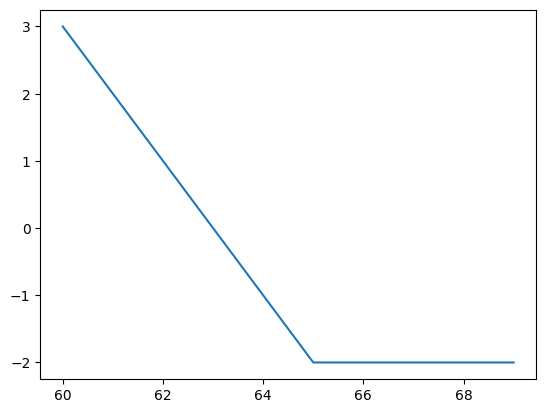

In [421]:
a.multi_option()

In [424]:
a.multi_options_pos = {'amount':[1,1,-3,4,1],'exercise_price':[65,65,70,80,65],
                       'option_type':['call','put','call','call','put'],
                      'contract_price':[2,2.1,1.5,1,1.5]}

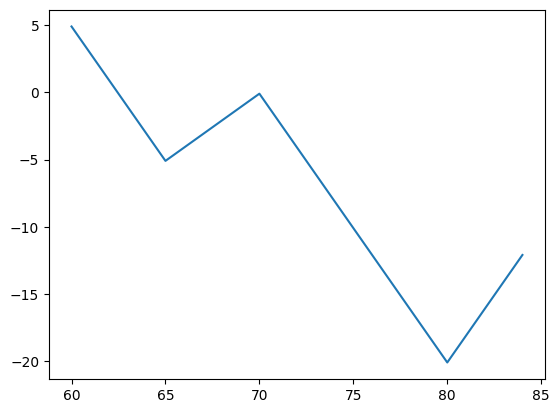

In [425]:
a.multi_option()

In [320]:
a.slope

array([  0,   0,   0,   0,   0,   0,   1,   2,   3,   4,   5,   3,   1,
        -1,  -3,  -5,  -7,  -9, -11, -13, -15, -13, -11,  -9,  -7])